Epoch 1/2000
12/12 [==============================] - 0s 1ms/step - loss: 2.9571 - accuracy: 0.2281
Epoch 2/2000
12/12 [==============================] - 0s 1ms/step - loss: 1.0817 - accuracy: 0.5789
Epoch 3/2000
12/12 [==============================] - 0s 1ms/step - loss: 0.7051 - accuracy: 0.7018
Epoch 4/2000
12/12 [==============================] - 0s 1ms/step - loss: 0.5481 - accuracy: 0.7368
Epoch 5/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.4694 - accuracy: 0.7719
Epoch 6/2000
12/12 [==============================] - 0s 3ms/step - loss: 0.4429 - accuracy: 0.7719
Epoch 7/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.7719
Epoch 8/2000
12/12 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.7719
Epoch 9/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.3772 - accuracy: 0.7544
Epoch 10/2000
12/12 [==============================] - 0s 2ms/step - loss: 0.3562 - accuracy: 0.8070

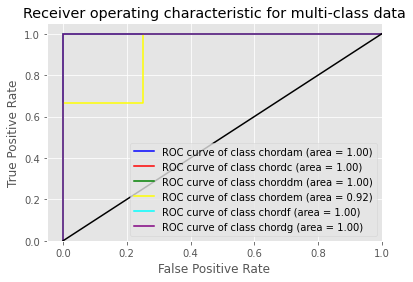

In [41]:
import pandas
from keras.models import Sequential
from keras.layers import Dense
from keras.wrappers.scikit_learn import KerasClassifier
from keras.utils import np_utils
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder
from sklearn.pipeline import Pipeline

# load dataset
dataframe = pandas.read_csv("deeplearning10FIXdataSet.csv", header = None)
dataset = dataframe.values
column = 1000
jclass = 6
X = dataset[:,0:column].astype(float)
Y = dataset[:,column]

# encode class values as integers
encoder = LabelEncoder()
encoder.fit(Y)
encoded_Y = encoder.transform(Y)
# Konversi integers menjadi variable dummy
dummy_y = np_utils.to_categorical(encoded_Y)

# convert integers to dummy variables (i.e. one hot encoded)
model = Sequential()
model.add(Dense(8, input_dim=column, activation='relu'))
model.add(Dense(jclass, activation='softmax'))

# Compile model
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

nepochs = 2000
nbatch = 5

# ------------ use package
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, dummy_y, test_size = 0.20)


model.fit(X_train, y_train, epochs=nepochs, batch_size=nbatch)
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy Score: %.2f' % (accuracy*100))

model.save_weights("model.h5")
y_score = model.predict(X_test)
y_score
_, accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy*100) + '%')

n_classes = y_test.shape[1]

# Plotting dan estimasikan FPR, TPR
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
 fpr[i], tpr[i], _ = roc_curve(y_test[:, i], y_score[:, i])
 roc_auc[i] = auc(fpr[i], tpr[i])
colors = cycle(['blue', 'red', 'green', 'yellow', 'cyan', 'purple'])
for i, color in zip(range(n_classes), colors):
 plt.plot(fpr[i], tpr[i], color=color, lw=1.5, label='ROC curve of class {0} (area = {1:0.2f})' ''.format(classes[i], roc_auc[i]))
plt.plot([0, 1], [0, 1], 'k-', lw=1.5)
plt.xlim([-0.05, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic for multi-class data')
plt.legend(loc="lower right")
plt.show()